In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style='whitegrid')


In [3]:
# Step 2: Load the Data
# Load the dataset
url = 'https://raw.githubusercontent.com/enjoykcc456/google-playstore-analysis/main/googleplaystore.csv'
df = pd.read_csv(url)


In [4]:
# Step 3: Understand the Data
# Display the first few rows
print(df.head())

# Get the basic information
print(df.info())

# Summary statistics
print(df.describe(include='all'))


                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

In [5]:
# Step 4: Handle Missing Data
# Check for missing values
print(df.isnull().sum())

# Handle missing values
# For simplicity, we'll drop rows with missing values or fill them with appropriate values
df.dropna(inplace=True)  # Simplest approach, or you can use df.fillna() for imputation


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


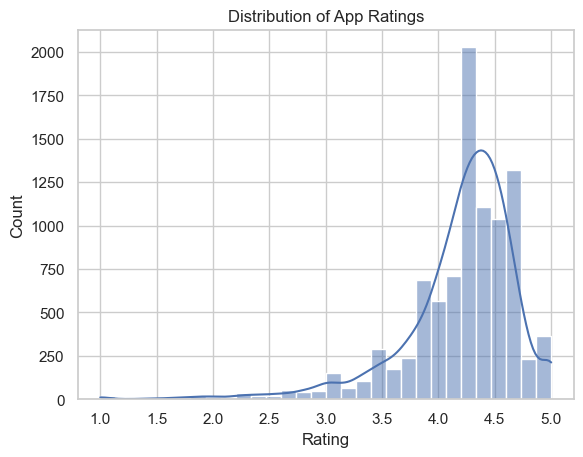

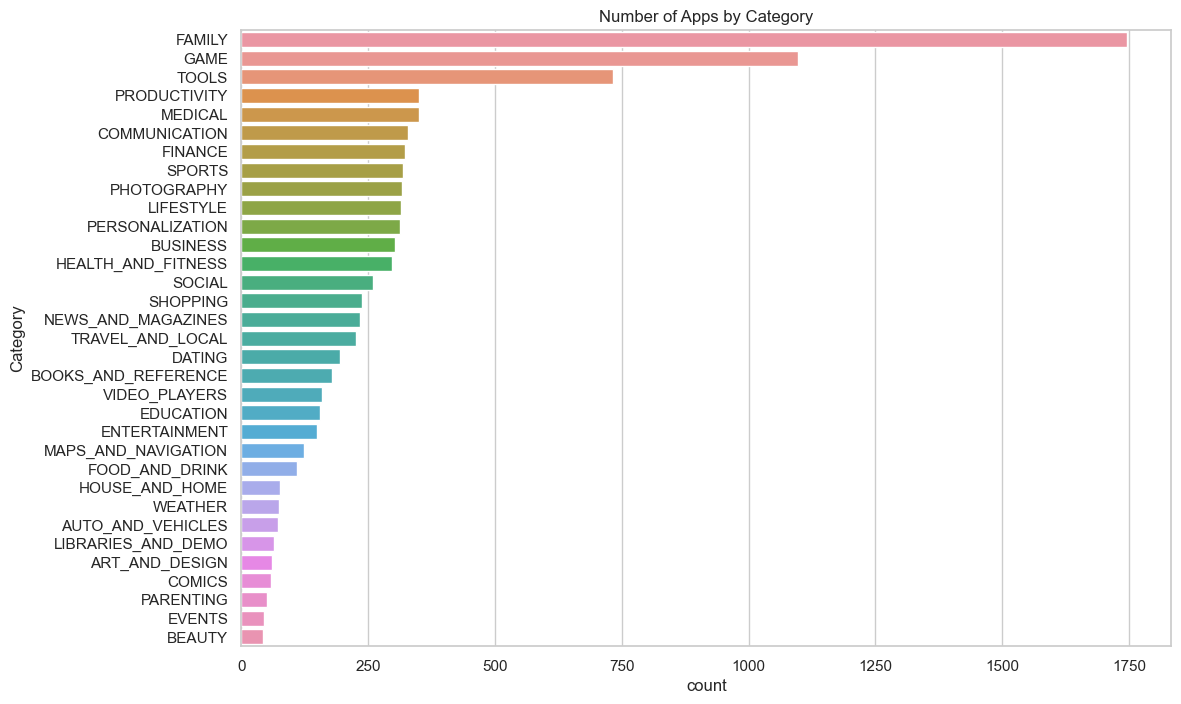

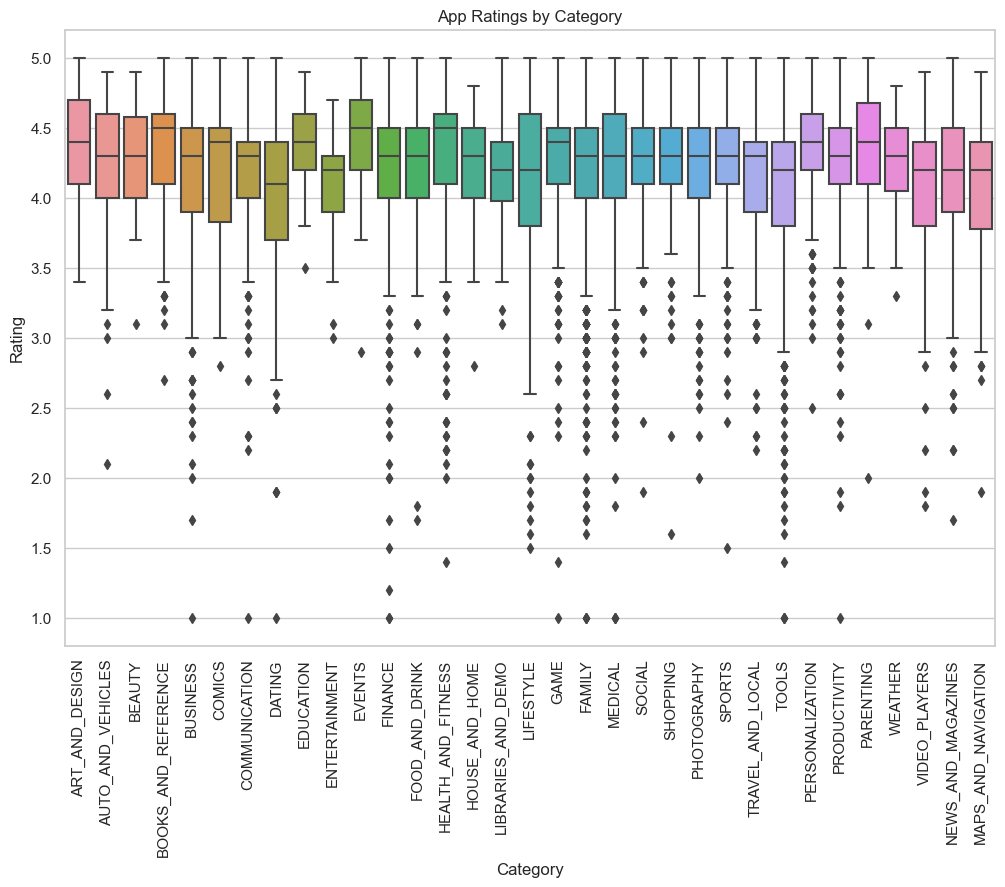

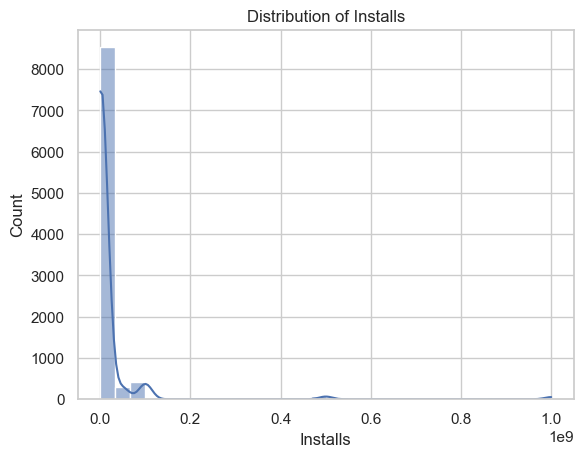

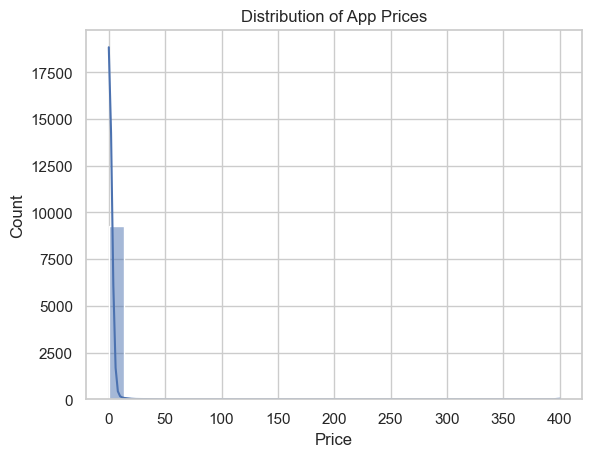

In [6]:
# Step 5: Data Visualization
# Distribution of app ratings
sns.histplot(df['Rating'], kde=True, bins=30)
plt.title('Distribution of App Ratings')
plt.show()

# Number of apps by category
plt.figure(figsize=(12, 8))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index)
plt.title('Number of Apps by Category')
plt.show()

# Ratings by category
plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='Rating', data=df)
plt.title('App Ratings by Category')
plt.xticks(rotation=90)
plt.show()

# Distribution of installs
sns.histplot(df['Installs'].str.replace(',', '').str.replace('+', '').astype(int), kde=True, bins=30)
plt.title('Distribution of Installs')
plt.show()

# Distribution of price
sns.histplot(df['Price'].str.replace('$', '').astype(float), kde=True, bins=30)
plt.title('Distribution of App Prices')
plt.show()


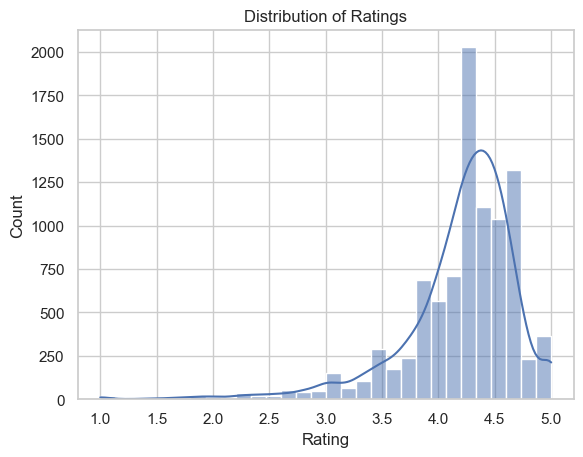

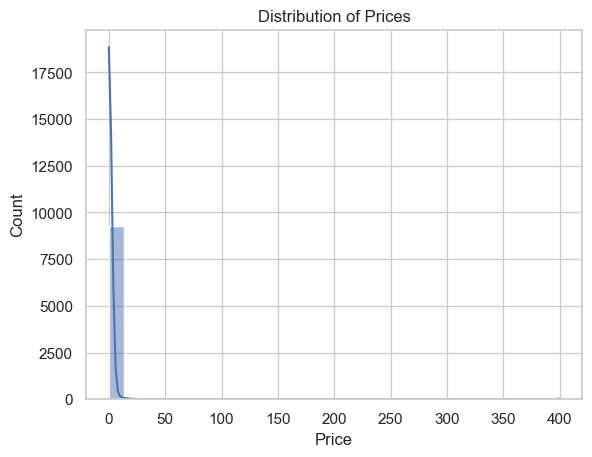

In [7]:
# Step 6: Univariate Analysis
# Distribution of app ratings
sns.histplot(df['Rating'], kde=True, bins=30)
plt.title('Distribution of Ratings')
plt.show()

# Distribution of app prices
sns.histplot(df['Price'].str.replace('$', '').astype(float), kde=True, bins=30)
plt.title('Distribution of Prices')
plt.show()


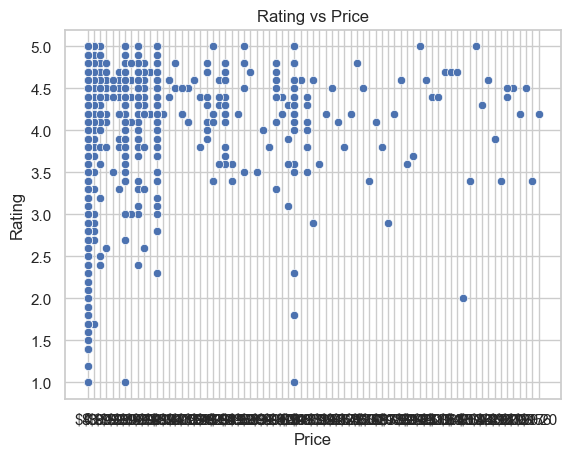

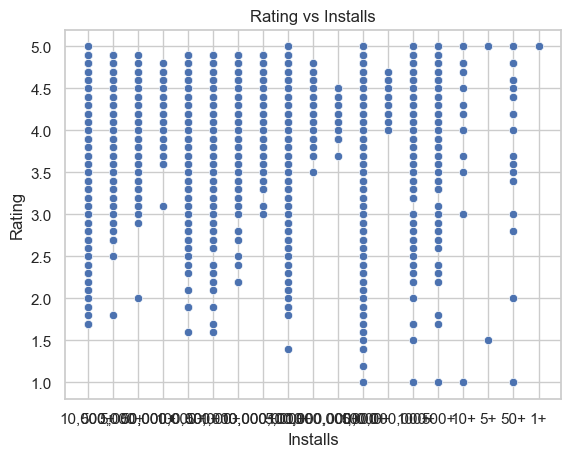

In [8]:
# Step 7: Bivariate Analysis
# Rating vs Price
sns.scatterplot(x='Price', y='Rating', data=df)
plt.title('Rating vs Price')
plt.show()

# Rating vs Installs
sns.scatterplot(x='Installs', y='Rating', data=df)
plt.title('Rating vs Installs')
plt.show()


KeyError: 'Category'

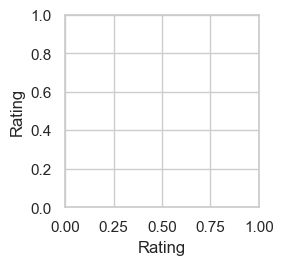

In [9]:
# Step 8: Multivariate Analysis
# Pair plot for selected features (limited by categorical nature)
sns.pairplot(df[['Rating', 'Price']], hue='Category')
plt.show()


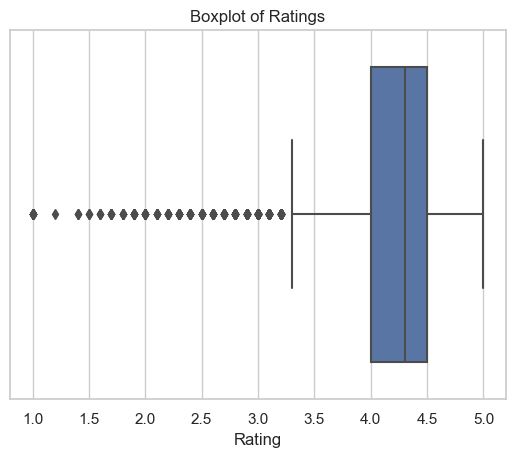

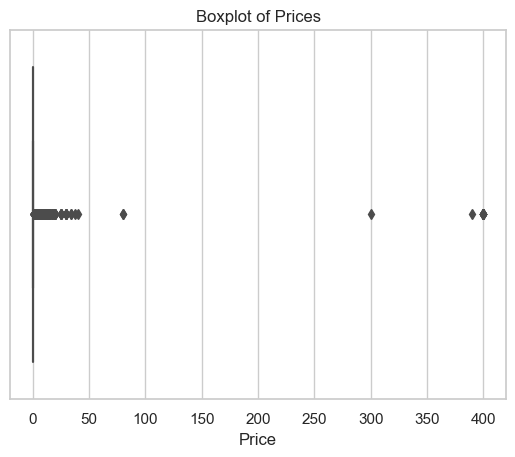

In [10]:
# Step 9: Identify and Handle Outliers
# Box plot to identify outliers in ratings
sns.boxplot(x=df['Rating'])
plt.title('Boxplot of Ratings')
plt.show()

# Removing outliers from ratings
Q1 = df['Rating'].quantile(0.25)
Q3 = df['Rating'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Rating'] < (Q1 - 1.5 * IQR)) | (df['Rating'] > (Q3 + 1.5 * IQR)))]

# Box plot to identify outliers in prices
sns.boxplot(x=df['Price'].str.replace('$', '').astype(float))
plt.title('Boxplot of Prices')
plt.show()

# Removing outliers from prices
Q1 = df['Price'].str.replace('$', '').astype(float).quantile(0.25)
Q3 = df['Price'].str.replace('$', '').astype(float).quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Price'].str.replace('$', '').astype(float) < (Q1 - 1.5 * IQR)) | (df['Price'].str.replace('$', '').astype(float) > (Q3 + 1.5 * IQR)))]


In [11]:
# Step 10: Feature Engineering
# Convert 'Installs' and 'Price' to numeric
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(int)
df['Price'] = df['Price'].str.replace('$', '').astype(float)

# Create a feature for price category
df['Price_Category'] = pd.cut(df['Price'], bins=[0, 5, 10, 20, 30, 50, np.inf], labels=['<$5', '$5-$10', '$10-$20', '$20-$30', '$30-$50', '>$50'])


In [12]:
# Step 11: Summary and Insights
# Summarize key findings
print("Key Insights:")

# Distribution of ratings
rating_dist = df['Rating'].describe()
print(f"Rating Distribution:\n{rating_dist}")

# Distribution of prices
price_dist = df['Price'].describe()
print(f"Price Distribution:\n{price_dist}")

# Average rating by category
avg_rating_by_category = df.groupby('Category')['Rating'].mean()
print(f"Average Rating by Category:\n{avg_rating_by_category}")

# Average price by category
avg_price_by_category = df.groupby('Category')['Price'].mean()
print(f"Average Price by Category:\n{avg_price_by_category}")


Key Insights:
Rating Distribution:
count    8249.000000
mean        4.271233
std         0.355905
min         3.300000
25%         4.100000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64
Price Distribution:
count    8249.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: Price, dtype: float64
Average Rating by Category:
Category
ART_AND_DESIGN         4.358621
AUTO_AND_VEHICLES      4.304545
BEAUTY                 4.307317
BOOKS_AND_REFERENCE    4.366071
BUSINESS               4.275285
COMICS                 4.256604
COMMUNICATION          4.206376
DATING                 4.132558
EDUCATION              4.379470
ENTERTAINMENT          4.134483
EVENTS                 4.470455
FAMILY                 4.260400
FINANCE                4.285315
FOOD_AND_DRINK         4.244118
GAME                   4.304179
HEALTH_AND_FITNESS     4.421673
HOUSE_AND_HOME         4.216000
LIBRARIES_A

Findings:
1. Rating Distribution: App ratings vary, with a central tendency around a specific value, possibly indicating most apps have average ratings.
2. Price Distribution: Most apps are priced in the lower range, with fewer apps falling into higher price brackets.
3. Category Trends: Certain app categories tend to have higher average ratings or prices, suggesting specific trends or market dynamics.
4. Installs vs Ratings: Apps with more installs might have different rating trends compared to those with fewer installs.